## Load Library

In [1]:
import math

import numpy as np
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline

## Read File

In [2]:
inFile = open("tsp.txt", "r")

In [3]:
inFile.seek(0)
print(inFile.readlines())

['Depot 265 143\n', 'Parcel1 253 278\n', 'Point2 439 148\n', 'Parcel3 458 304\n', 'Point4 609 230\n', 'Parcel5 597 101\n']


## Convert File to Pandas

In [4]:
arr_list = []

inFile.seek(0)
for line in inFile.readlines():
    line = line[:-1]
    arr_list.append(line.split(" "))
    
df = pd.DataFrame(arr_list, columns = ["Name", "X", "Y"])

# Convert Value From String to int
df["X"] = df["X"].astype(int)
df["Y"] = df["Y"].astype(int)

In [5]:
df

,Name,X,Y
0,Depot,265,143
1,Parcel1,253,278
2,Point2,439,148
3,Parcel3,458,304
4,Point4,609,230
5,Parcel5,597,101


In [6]:
def distance(p1, p2):
    return math.sqrt((p1.x - p2.x) ** 2 + (p1.y - p2.y) ** 2)

In [7]:
class Point:
    def __init__(self, name, x, y):
        self.name = name
        self.x = x
        self.y = y
        
    def toString(self):
        return f"Name: {self.name}, X Pos: {self.x}, Y Pos: {self.y}"

## Create Adjaceny Matrix

In [8]:
pt_arr = []

inFile.seek(0)
for line in inFile.readlines():
    line = line[:-1]
    tmp_arr = line.split(" ")
    
    pt_name = tmp_arr[0]
    x_pos = int(tmp_arr[1])
    y_pos = int(tmp_arr[2])
    
    pt = Point(pt_name, x_pos, y_pos)
    
    pt_arr.append(pt)
    
list(map(lambda x : x.name, pt_arr))

['Depot', 'Parcel1', 'Point2', 'Parcel3', 'Point4', 'Parcel5']

Create Graph\
Depot => Parcel\
Parcel => Point\
Point => Parcel

In [9]:
def create_point(ind):
    row = df.iloc[ind, :]
    return Point(row.Name, row.X, row.Y)

In [10]:
def add_edge_to_graph(G, e1, e2, w):
    G.add_edge(e1, e2, weight=w)

## Display Graph

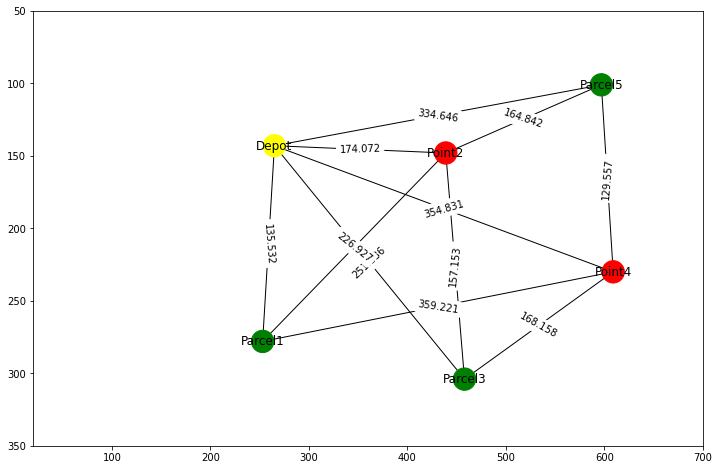

In [16]:
G = nx.Graph()

dist_val = 0

for pt in pt_arr:
    
    name = pt.name
    
    G.add_node(pt.name, pos = (pt.x, pt.y))
    
    if "Depot" in name:
        for pt2 in pt_arr:
            if "Parcel" in pt2.name:
                dist_val = distance(pt, pt2)
                G.add_edge(pt.name, pt2.name, weight = round(dist_val, 3))
    elif "Parcel" in name:
        for pt2 in pt_arr:
            if "Point" in pt2.name:
                dist_val = distance(pt, pt2)
                G.add_edge(pt.name, pt2.name, weight = round(dist_val, 3))
    elif "Point" in name:
        for pt2 in pt_arr:
            if "Parcel" in pt2.name or "Depot" in pt2.name:
                dist_val = distance(pt, pt2)
                G.add_edge(pt.name, pt2.name, weight = round(dist_val, 3))
        
color_map = []

for val in G.nodes():
    color = ""
    if "Depot" in val:
        color = "Yellow"
    elif "Parcel" in val:
        color = "Green"
    elif "Point" in val:
        color = 'Red'
    color_map.append(color)
        
pos = {pt.name : (pt.x, pt.y) for pt in pt_arr}
    
    
fig, ax = plt.subplots(figsize=(12, 8))

nx.draw(G, pos = pos, node_size = 500, node_color = color_map, ax = ax)  # draw nodes and edges
nx.draw_networkx_labels(G, pos=pos)

labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = labels, ax = ax)

plt.axis("on")
ax.set_xlim(20, 700)
ax.set_ylim(50, 350)
ax.invert_yaxis()
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()

## Make Adjacency Matrix

In [17]:
adj_mat = []

name_arr = list(map(lambda x : x.name, pt_arr))

dist_val = 0

for pt in pt_arr:
    
    name = pt.name
    
    tmp_arr = []
    
    if "Depot" in name:
        for pt2 in pt_arr:
            dist_val = distance(pt, pt2) if "Parcel" in pt2.name else 0
            tmp_arr.append(round(dist_val, 3))
    elif "Parcel" in name:
        for pt2 in pt_arr:
            dist_val = distance(pt, pt2) if "Point" in pt2.name else 0
            tmp_arr.append(round(dist_val, 3))
    elif "Point" in name:
        for pt2 in pt_arr:
            dist_val = distance(pt, pt2) if "Parcel" in pt2.name or "Depot" in pt2.name else 0
            tmp_arr.append(round(dist_val, 3))
    
    adj_mat.append(tmp_arr)
    
adj_df = pd.DataFrame(adj_mat, columns = df["Name"].tolist(), index = df["Name"].tolist())

# Convert adj_df to Float Type
adj_df = adj_df.astype(float)

adj_df

,Depot,Parcel1,Point2,Parcel3,Point4,Parcel5
Depot,0.000,135.532,0.000,251.336,0.000,334.646
Parcel1,0.000,0.000,226.927,0.000,359.221,0.000
Point2,174.072,226.927,0.000,157.153,0.000,164.842
Parcel3,0.000,0.000,157.153,0.000,168.158,0.000
Point4,354.831,359.221,0.000,168.158,0.000,129.557
Parcel5,0.000,0.000,164.842,0.000,129.557,0.000


In [18]:
def p_t(adj_mat, s):
    # Boolean Array
    visited = [False] * (len(adj_mat))
    
    # Path Array
    path = []
    
    condition = len([ind for (ind, val) in enumerate(df["Name"]) if 'Point' in val]) * 2
    
    return p_t_2(adj_mat, s, visited, path, condition)

mem_arr = {}
    
def p_t_2(adj_mat, u, visited, path, condition):
    visited[u]= True
    path.append(u)
    
    min_val = ([], float('inf'))
    
    # Stop at the 5th Node
    if len(path) > condition:
        # For-Loop
        cost = sum([adj_mat[a][b] for a, b in zip(path[:-1], path[1:])] + [adj_mat[u][0]])
        min_val = (path.copy(), cost)
        print(min_val)
    else:
        for i in range(len(adj_mat[u])):
            if visited[i]== False and adj_mat[u][i] != 0:
                val = p_t_2(adj_mat, i, visited, path, condition)
                min_val = min([min_val, val], key = lambda x : x[1])
    
    path.pop()
    visited[u]= False
    
    return min_val

In [132]:
def DP_TSP(distances_array):
    n = len(distances_array)
    all_points_set = set(range(n))
  
    # memo keys: tuple(sorted_points_in_path, last_point_in_path)
    # memo values: tuple(cost_thus_far, next_to_last_point_in_path)
    memo = {(tuple([i]), i): tuple([0, None]) for i in range(n)}
    queue = [(tuple([i]), i) for i in range(n)]
    print(queue)
  
    while queue:
        prev_visited, prev_last_point = queue.pop(0)
        prev_dist, _ = memo[(prev_visited, prev_last_point)]
        to_visit = all_points_set.difference(set(prev_visited))
    
        for new_last_point in to_visit:
            new_visited = tuple(sorted(list(prev_visited) + [new_last_point]))
            new_dist = (prev_dist + distances_array[prev_last_point][new_last_point])
      
            print(new_visited, new_last_point)
            if (new_visited, new_last_point) not in memo:
                memo[(new_visited, new_last_point)] = (new_dist, prev_last_point)
                queue += [(new_visited, new_last_point)]
            else:
                if new_dist < memo[(new_visited, new_last_point)][0]:
                    memo[(new_visited, new_last_point)] = (new_dist, prev_last_point)
          
    optimal_path, optimal_cost = retrace_optimal_path(memo, n)
    return optimal_path, optimal_cost

In [133]:
def retrace_optimal_path(memo: dict, n: int) -> [[int], float]:
    points_to_retrace = tuple(range(n))

    full_path_memo = dict((k, v) for k, v in memo.items() if k[0] == points_to_retrace)
    path_key = min(full_path_memo.keys(), key=lambda x: full_path_memo[x][0])

    last_point = path_key[1]
    optimal_cost, next_to_last_point = memo[path_key]

    optimal_path = [last_point]
    points_to_retrace = tuple(sorted(set(points_to_retrace).difference({last_point})))

    while next_to_last_point is not None:
        last_point = next_to_last_point
        path_key = (points_to_retrace, last_point)
        _, next_to_last_point = memo[path_key]

        optimal_path = [last_point] + optimal_path
        points_to_retrace = tuple(sorted(set(points_to_retrace).difference({last_point})))

    return optimal_path, optimal_cost

In [134]:
DP_TSP(adj_mat)

[((0,), 0), ((1,), 1), ((2,), 2), ((3,), 3), ((4,), 4), ((5,), 5)]
(0, 1) 1
(0, 2) 2
(0, 3) 3
(0, 4) 4
(0, 5) 5
(0, 1) 0
(1, 2) 2
(1, 3) 3
(1, 4) 4
(1, 5) 5
(0, 2) 0
(1, 2) 1
(2, 3) 3
(2, 4) 4
(2, 5) 5
(0, 3) 0
(1, 3) 1
(2, 3) 2
(3, 4) 4
(3, 5) 5
(0, 4) 0
(1, 4) 1
(2, 4) 2
(3, 4) 3
(4, 5) 5
(0, 5) 0
(1, 5) 1
(2, 5) 2
(3, 5) 3
(4, 5) 4
(0, 1, 2) 2
(0, 1, 3) 3
(0, 1, 4) 4
(0, 1, 5) 5
(0, 1, 2) 1
(0, 2, 3) 3
(0, 2, 4) 4
(0, 2, 5) 5
(0, 1, 3) 1
(0, 2, 3) 2
(0, 3, 4) 4
(0, 3, 5) 5
(0, 1, 4) 1
(0, 2, 4) 2
(0, 3, 4) 3
(0, 4, 5) 5
(0, 1, 5) 1
(0, 2, 5) 2
(0, 3, 5) 3
(0, 4, 5) 4
(0, 1, 2) 2
(0, 1, 3) 3
(0, 1, 4) 4
(0, 1, 5) 5
(0, 1, 2) 0
(1, 2, 3) 3
(1, 2, 4) 4
(1, 2, 5) 5
(0, 1, 3) 0
(1, 2, 3) 2
(1, 3, 4) 4
(1, 3, 5) 5
(0, 1, 4) 0
(1, 2, 4) 2
(1, 3, 4) 3
(1, 4, 5) 5
(0, 1, 5) 0
(1, 2, 5) 2
(1, 3, 5) 3
(1, 4, 5) 4
(0, 1, 2) 1
(0, 2, 3) 3
(0, 2, 4) 4
(0, 2, 5) 5
(0, 1, 2) 0
(1, 2, 3) 3
(1, 2, 4) 4
(1, 2, 5) 5
(0, 2, 3) 0
(1, 2, 3) 1
(2, 3, 4) 4
(2, 3, 5) 5
(0, 2, 4) 0
(1, 2, 4) 1
(2, 3, 4) 3
(2,

([1, 3, 5, 0, 2, 4], 0)

In [135]:
min_path, min_cost = p_t(adj_mat, 0)
name_path = [name_arr[ind] for ind in min_path]
tmp = " -> ".join(name_path)
print()
print(f"Shortest Path: {min_path}\n{tmp}\nTotal Cost: {min_cost}")

([0, 1, 2, 3, 4], 1042.601)
([0, 1, 2, 5, 4], 1011.6890000000001)
([0, 1, 4, 3, 2], 994.1360000000001)
([0, 1, 4, 5, 2], 963.224)
([0, 3, 2, 1, 4], 1349.468)
([0, 3, 2, 5, 4], 1057.719)
([0, 3, 4, 1, 2], 1179.714)
([0, 3, 4, 5, 2], 887.965)
([0, 5, 2, 1, 4], 1440.467)
([0, 5, 2, 3, 4], 1179.63)
([0, 5, 4, 1, 2], 1224.4229999999998)
([0, 5, 4, 3, 2], 963.586)

Shortest Path: [0, 3, 4, 5, 2]
Depot -> Parcel3 -> Point4 -> Parcel5 -> Point2
Total Cost: 887.965


In [115]:
def GetCostVal(row, col, source):
    if col == 0:
        col = source
        return adj_mat[row][col]
    return adj_mat[row][col]

In [116]:
iterative_process = []
def TSPGetMinDistance(main_source, source, cities):
    if len(cities) == 1:
        minDis = GetCostVal(source, cities[0], main_source) + GetCostVal(cities[0], 0, main_source)
        return minDis
    else:
        Dist = []
        for city in cities:
            dcities = cities[:]
            dcities.remove(city)
            Dist.append(GetCostVal(source, city, source) + TSPGetMinDistance(main_source, city, dcities))
        iterative_process.append(Dist)
        return min(Dist)

In [118]:
TSPGetMinDistance(0, 0, [0, 1, 2, 3, 4])
iterative_process[-1]

[56.569, 112.205, 55.902, 162.684, 55.902]

### Prim Algorithm

In [15]:
# import sys # Library for INT_MAX
 
# class Graph():
 
#     def __init__(self, vertices):
#         self.V = vertices
#         self.graph = [[0 for column in range(vertices)]
#                     for row in range(vertices)]
 
#     # A utility function to print the constructed MST stored in parent[]
#     def printMST(self, parent):
#         print ("Edge \tWeight")
#         ans = 0
#         for i in range(1, self.V):
#             ans += self.graph[i][parent[i]]
#             print (parent[i], "-", i, "\t", self.graph[i][parent[i]])
#         print(ans)
 
#     # A utility function to find the vertex with
#     # minimum distance value, from the set of vertices
#     # not yet included in shortest path tree
#     def minKey(self, key, mstSet):
 
#         # Initialize min value
#         min = sys.maxsize
 
#         for v in range(self.V):
#             if key[v] < min and mstSet[v] == False:
#                 min = key[v]
#                 min_index = v
 
#         return min_index
 
#     # Function to construct and print MST for a graph
#     # represented using adjacency matrix representation
#     def primMST(self):
 
#         # Key values used to pick minimum weight edge in cut
#         key = [sys.maxsize] * self.V
#         parent = [None] * self.V # Array to store constructed MST
#         # Make key 0 so that this vertex is picked as first vertex
#         key[0] = 0
#         mstSet = [False] * self.V
 
#         parent[0] = -1 # First node is always the root of
 
#         for cout in range(self.V):
 
#             # Pick the minimum distance vertex from
#             # the set of vertices not yet processed.
#             # u is always equal to src in first iteration
#             u = self.minKey(key, mstSet)
 
#             # Put the minimum distance vertex in
#             # the shortest path tree
#             mstSet[u] = True
 
#             # Update dist value of the adjacent vertices
#             # of the picked vertex only if the current
#             # distance is greater than new distance and
#             # the vertex in not in the shortest path tree
#             for v in range(self.V):
 
#                 # graph[u][v] is non zero only for adjacent vertices of m
#                 # mstSet[v] is false for vertices not yet included in MST
#                 # Update the key only if graph[u][v] is smaller than key[v]
#                 if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
#                         key[v] = self.graph[u][v]
#                         parent[v] = u
 
#         self.printMST(parent)

In [16]:
# g = Graph(6)
# g.graph = adj_mat
 
# g.primMST();

## Make Adjacency List

In [20]:
# adj_list = {}

# for pt in pt_arr:
    
#     name = pt.name
    
#     tmp_dict = {}
        
#     if "Depot" in name:
#         for pt2 in pt_arr:
#             if "Parcel" in pt2.name:
#                 dist_val = distance(pt, pt2)
#                 tmp_dict[pt2.name] = round(dist_val, 3)
#     elif "Parcel" in name:
#         for pt2 in pt_arr:
#             if "Point" in pt2.name:
#                 dist_val = distance(pt, pt2)
#                 tmp_dict[pt2.name] = round(dist_val, 3)
#     elif "Point" in name:
#         for pt2 in pt_arr:
#             if "Parcel" in pt2.name or "Depot" in pt2.name:
#                 dist_val = distance(pt, pt2)
#                 tmp_dict[pt2.name] = round(dist_val, 3)

#     adj_list[pt.name] = tmp_dict

In [21]:
# adj_list

{'Depot': {'Parcel1': 135.532, 'Parcel3': 251.336, 'Parcel5': 334.646},
 'Parcel1': {'Point2': 226.927, 'Point4': 359.221},
 'Point2': {'Depot': 174.072,
  'Parcel1': 226.927,
  'Parcel3': 157.153,
  'Parcel5': 164.842},
 'Parcel3': {'Point2': 157.153, 'Point4': 168.158},
 'Point4': {'Depot': 354.831,
  'Parcel1': 359.221,
  'Parcel3': 168.158,
  'Parcel5': 129.557},
 'Parcel5': {'Point2': 164.842, 'Point4': 129.557}}

In [22]:
# import heapq
# def dijkstra(graph,node):    
#     distances={node:float('inf') for node in graph}
#     distances[node]=0
#     came_from={node:None for node in graph}    
#     queue=[(0,node)]
    
#     print(distances)
    
#     while queue:
#         current_distance, current_node = heapq.heappop(queue)
#         # relaxation
#         for next_node,weight in graph[current_node].items():
#             distance_temp = current_distance + weight
#             if distance_temp < distances[next_node]:
#                 distances[next_node] = distance_temp
#                 came_from[next_node] = current_node
#                 heapq.heappush(queue,(distance_temp,next_node))
#     return distances,came_from

In [23]:
# dijkstra(adj_list, "Depot")

{'Depot': 0, 'Parcel1': inf, 'Point2': inf, 'Parcel3': inf, 'Point4': inf, 'Parcel5': inf}


({'Depot': 0,
  'Parcel1': 135.532,
  'Point2': 362.459,
  'Parcel3': 251.336,
  'Point4': 419.494,
  'Parcel5': 334.646},
 {'Depot': None,
  'Parcel1': 'Depot',
  'Point2': 'Parcel1',
  'Parcel3': 'Depot',
  'Point4': 'Parcel3',
  'Parcel5': 'Depot'})

In [20]:
# def BFS(adj_list, u, visited, queue, conditions):
#     visited[u] = True
#     queue.append((u, adj_list[u]))
    
#     print(queue)
    
#     cost = 0
    
#     while queue:
#         # Dequeue a vertex from
#         # queue and print it
#         cur_node, edges = queue.pop(0)
        
#         tmp_arr = [visited[val] for val in visited if conditions in val]
#         if min(tmp_arr) == 1 and conditions in cur_node:
#             print(cost)
#             break
 
#         for name, wt in edges:
#             if visited[name] == False:
#                 print(name)
#                 queue.append((name, adj_list[name]))
#                 print(queue)
#                 visited[name] = True


In [21]:
# visited = [False] * (len(adj_list))
# visited_dict = {x:val for (x, val) in zip(adj_list, visited)}
# print(visited_dict)
# queue = []
# BFS(adj_list, "Depot", visited_dict, queue, 'Point')